# Portuguese bank marketting analysis 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# algorithms for supervised classification 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# evaluation
from sklearn import metrics 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, mean_squared_error

### EDA 

In [2]:
df= pd.read_csv("bank-additional-full.csv", delimiter=";",header='infer')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.shape

(41188, 21)

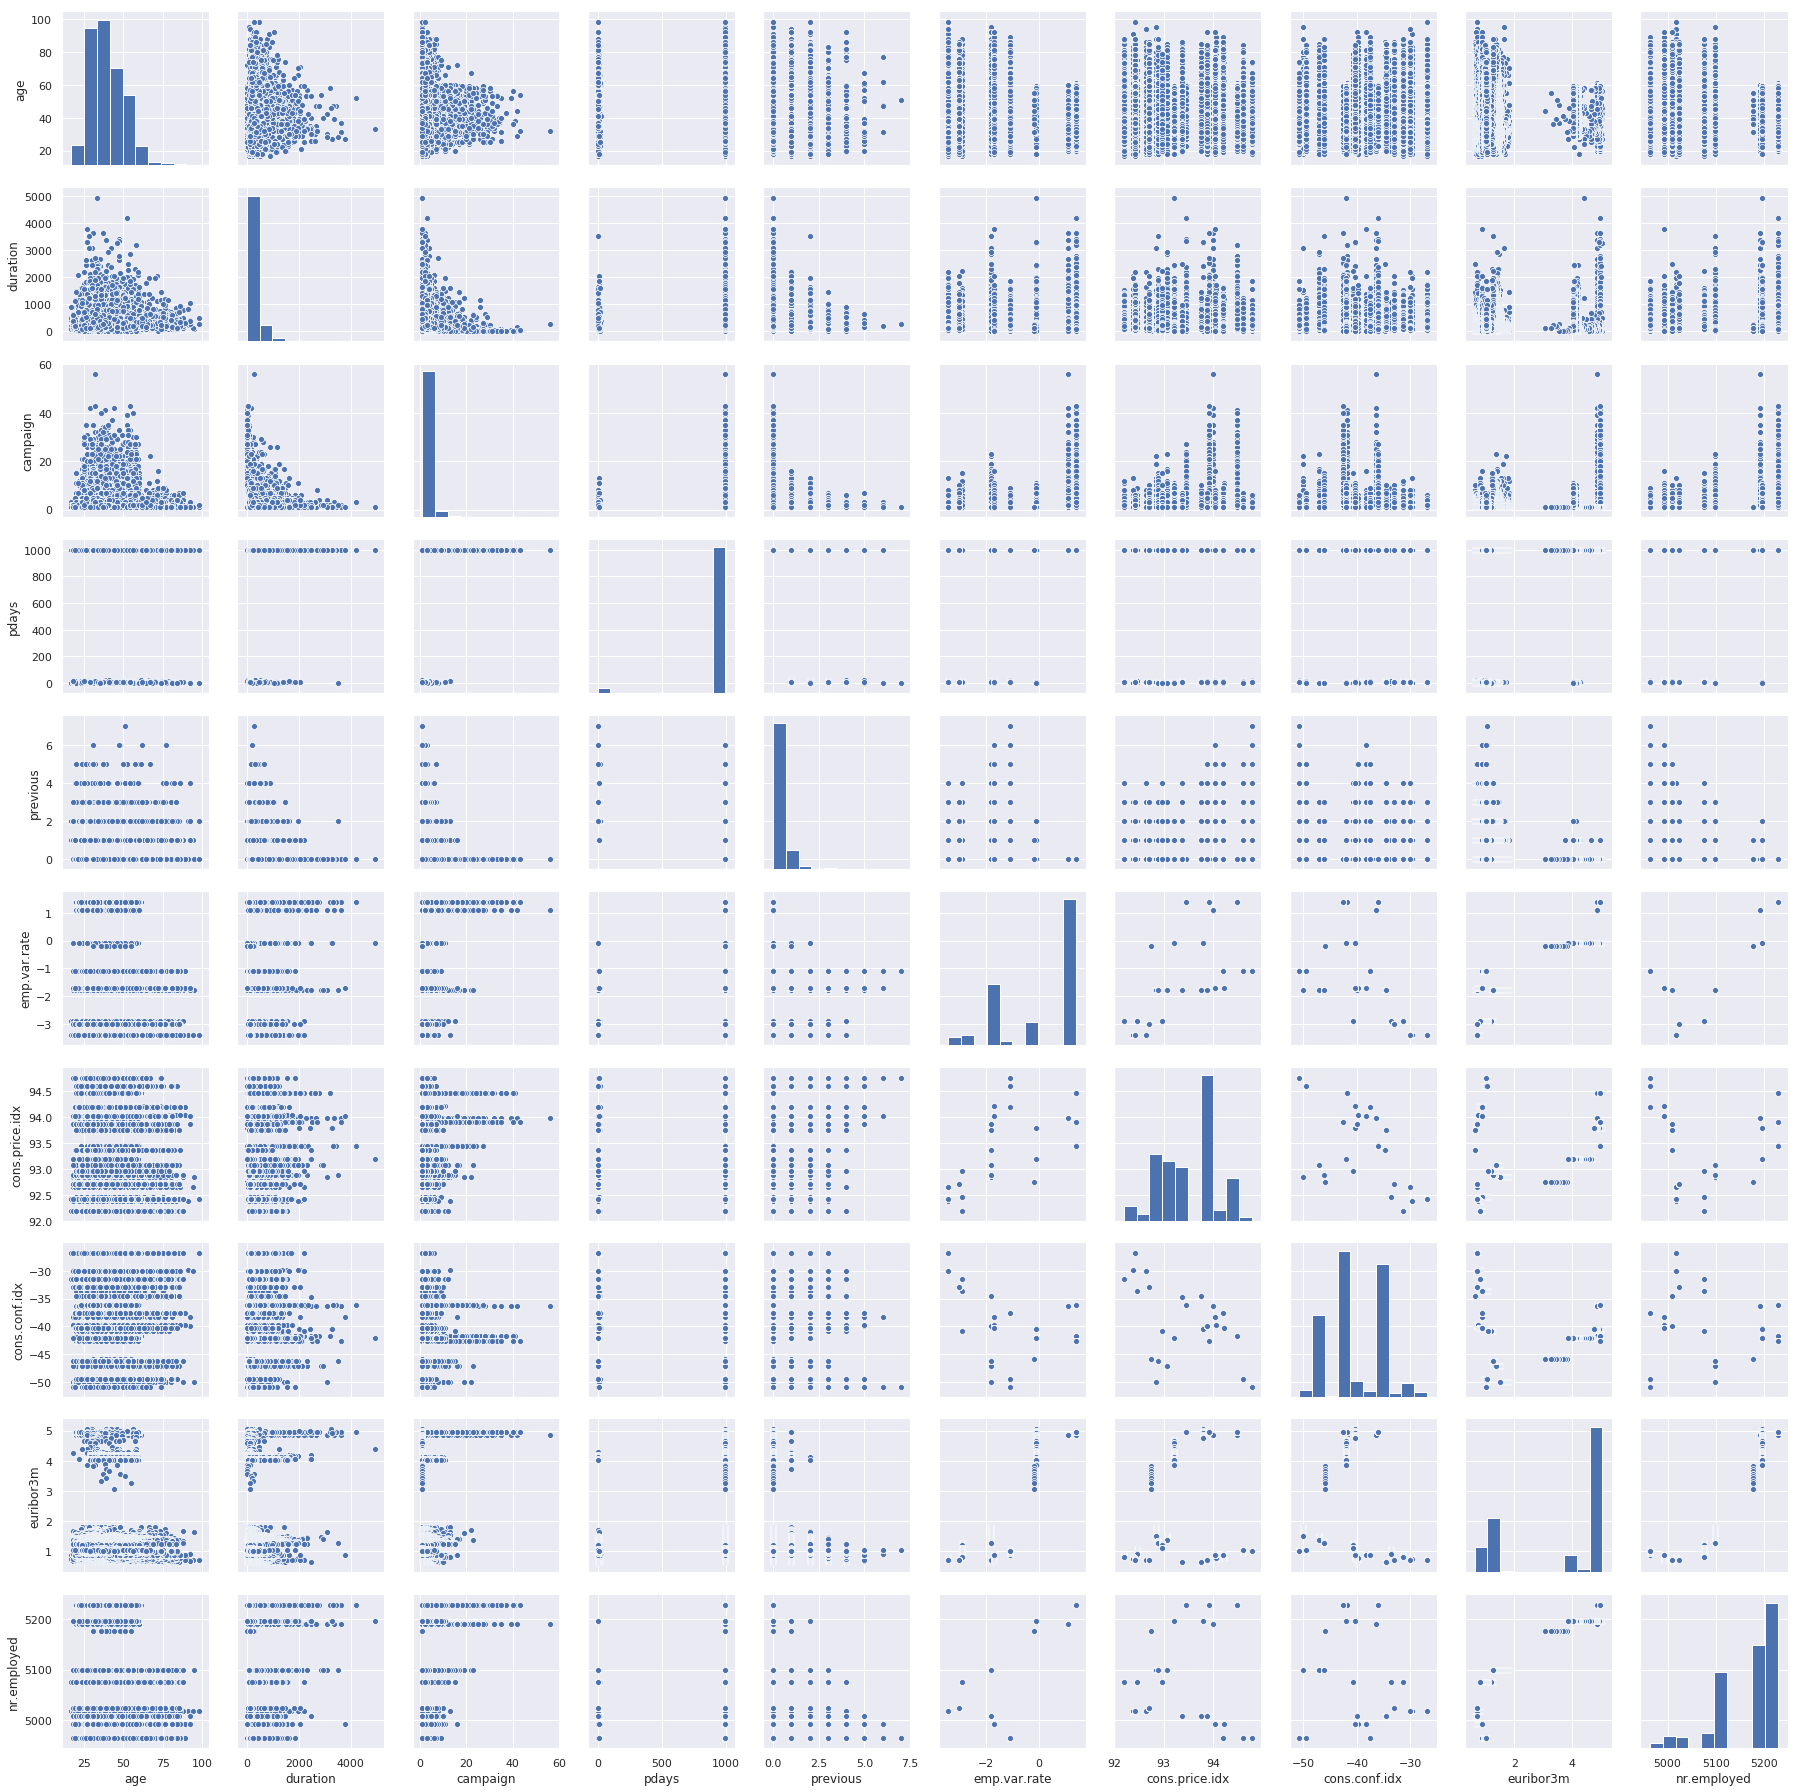

In [6]:
# to know the relationship between variables using pair-plot
sns.pairplot(df)

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df_new= pd.get_dummies(df, columns=['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [9]:
df_new.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [10]:
df_new.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df_new.y.replace(('yes', 'no'),(1,0), inplace=True)

### Conclusion: 
1. It is an unbalanced dataset where the no. of no is more than yes
2. The datapoints are not much correlated 

### Modelling and evaluation 

In [12]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [13]:
df_X = df_new.drop(['y'], axis=1)
df_y = pd.DataFrame(df_new['y'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

#### using KNN algo. 

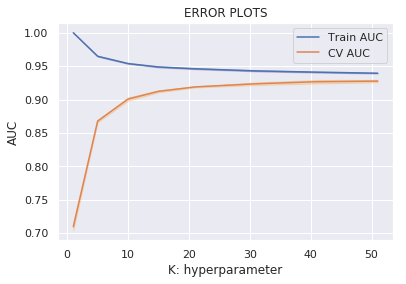

In [15]:
# using Grid Search CV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

K= [1, 5, 10, 15, 21, 31, 41, 51]
plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [16]:
print('Best hyper parameter: ', clf.best_params_)
print('Best Accuracy: ', clf.best_score_*100)

best_k= int(clf.best_params_['n_neighbors'])

Best hyper parameter:  {'n_neighbors': 51}
Best Accuracy:  92.76068320009809


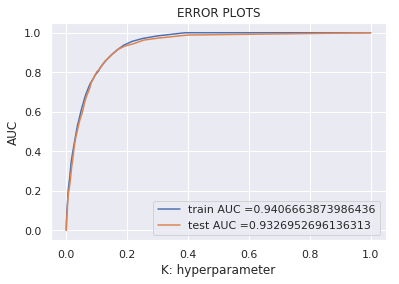

AUC:  0.7199298524042432
Accuracy score:  0.9125285073199441


In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()
print('AUC: ',roc_auc_score(y_test, neigh.predict(X_test)))

y_pred= neigh.predict(X_test)
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred ))

In [18]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test)))

Train confusion matrix
[[23730   762]
 [ 1601  1502]]
Test confusion matrix
[[11680   376]
 [  813   724]]


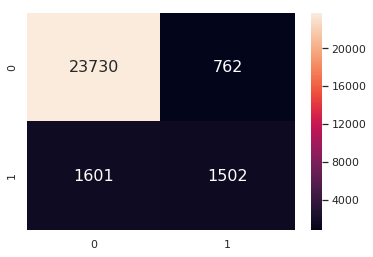

In [19]:
# confusion_matrix using seaborn.heatmap
df_train= pd.DataFrame(confusion_matrix(y_train, neigh.predict(X_train)))

sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g')

#### using Logistic Regression 

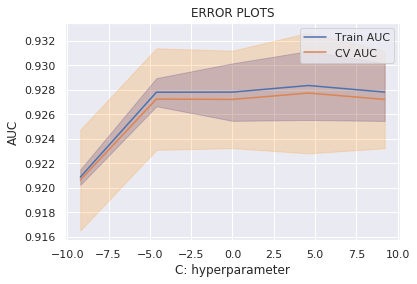

Best hyper parameter:  {'C': 100}
Model Score:  0.9277432064461401
Model estimator:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [20]:
# grid search CV
import math

ls=[10**-4, 10**-2, 10**0, 10**2, 10**4]
tuned_parameters = [{'C': ls}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)

train_auc= model.cv_results_['mean_train_score']
train_auc_std= model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score'] 
cv_auc_std= model.cv_results_['std_test_score']


log_my_data = [math.log(x) for x in ls]

plt.plot(log_my_data, (train_auc), label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('Best hyper parameter: ', model.best_params_)
print('Model Score: ', model.best_score_)
print('Model estimator: ', model.best_estimator_)
best_C= float(model.best_params_['C'])

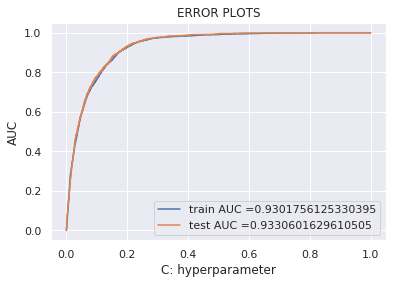

AUC:  0.6838742493356068
Accuracy score:  0.9101007871698669


In [21]:
lr_model = LogisticRegression(C= best_C)
lr_model.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print('AUC: ',roc_auc_score(y_train, lr_model.predict(X_train)))

y_pred= lr_model.predict(X_test)
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred ))

Test confusion matrix
[[11765   291]
 [  931   606]]


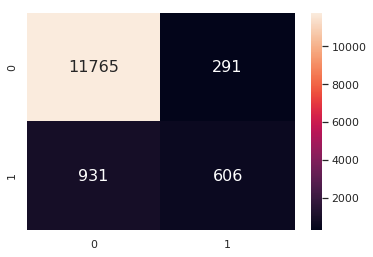

In [22]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, lr_model.predict(X_test)))

# conprint('AUC: ',roc_auc_score(Y_train, m_nb.predict(X_tr_bow)))fusion matrix visualization using seaborn heatmap 
df_test= pd.DataFrame(confusion_matrix(y_test, lr_model.predict(X_test)))
sns.heatmap(df_test, annot=True,annot_kws={"size": 16}, fmt='g')

In [28]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Hyper parameter(Alpha)", "Model Score", "Train(%)", "Test(%)"]

x.add_row(["KNN", 51, .92, 94, 93])
x.add_row(["Logistic Reg.", 100, .93, 93, 93])

print(x)

+---------------+------------------------+-------------+----------+---------+
|     Model     | Hyper parameter(Alpha) | Model Score | Train(%) | Test(%) |
+---------------+------------------------+-------------+----------+---------+
|      KNN      |           51           |     0.92    |    94    |    93   |
| Logistic Reg. |          100           |     0.93    |    93    |    93   |
+---------------+------------------------+-------------+----------+---------+


In [24]:
from xgboost import XGBClassifier
classifiers = {
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Random Forest Classifier': RandomForestClassifier(),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(),
               }


In [25]:
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
log = pd.DataFrame(columns=log_cols)

                        Classifier  Accuracy  Precision Score  Recall Score  \
0     Adaptive Boosting Classifier  0.908482         0.791223      0.687846   
0     Linear Discriminant Analysis  0.909659         0.780527      0.736762   
0         Random Forest Classifier  0.904363         0.773697      0.682401   
0         Decision Tree Classifier  0.887810         0.721296      0.728418   
0  Gaussian Naive Bayes Classifier  0.866843         0.682651      0.717733   
0        Support Vector Classifier  0.893990         0.741714      0.610704   

   F1-Score                     roc-auc_Score  
0  0.724218  <function auc at 0x7f46646c8a60>  
0  0.755999  <function auc at 0x7f46646c8a60>  
0  0.715306  <function auc at 0x7f46646c8a60>  
0  0.724769  <function auc at 0x7f46646c8a60>  
0  0.697603  <function auc at 0x7f46646c8a60>  
0  0.642627  <function auc at 0x7f46646c8a60>  


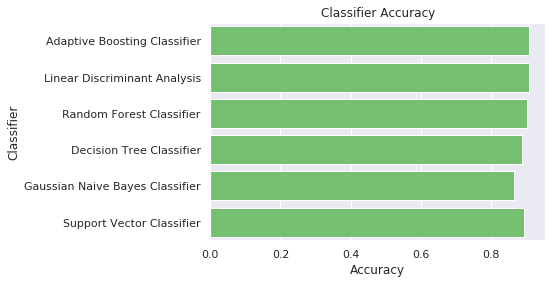

In [27]:
# ref. code: https://www.kaggle.com
for Name,classify in classifiers.items():
    cls = classify
    cls =cls.fit(X_train,y_train)
    y_out = cls.predict(X_test)
    accuracy = metrics.accuracy_score(y_test,y_out)
    precision = metrics.precision_score(y_test,y_out,average='macro')
    recall = metrics.recall_score(y_test,y_out,average='macro')
    #roc_auc = roc_auc_score(y_out,y_test)
    f1_score = metrics.f1_score(y_test,y_out,average='macro')
    log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,auc]], columns=log_cols)
    #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
    log = log.append(log_entry)
        #metric = metric.append(metric_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

### It works best with Logistic regression

### Conclusion wrt the financial benefits
1) Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

7) Develop a Questionaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.